# Reconhecimento de padrões de Mnist com H2O
---
* H2O é um pacote de machine learning e IA de processamento distribuido.
* Composto por dígitos escritos a mão, tratados e centralizados.
* Cada linha possui 785 atributos, cada um com o valor rgb de um pixel.
* O atributo 785 é a classe do dígito.
* Para visualização no R é necessário tranformar em uma matriz 28 x 28.

In [6]:
#install.packages('h2o')

In [5]:
library(h2o)

## Carregamento dos dados

In [9]:
dig = read.csv(gzfile("datasets/test.csv.gz"), header = F)

In [12]:
dim(dig)
head(dig)

[1] 10000   785

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,V785
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


## Visualizando alguns dígitos

In [26]:
dig_1 = t(matrix(unlist(dig[20, -785]), nrow = 28, byrow = F))
dig_1 = t(apply(dig_1, 2, rev))
dig_2 = t(matrix(unlist(dig[2, -785]), nrow = 28, byrow = F))
dig_2 = t(apply(dig_2, 2, rev))
dig_3 = t(matrix(unlist(dig[4, -785]), nrow = 28, byrow = F))
dig_3 = t(apply(dig_3, 2, rev))
dig_4 = t(matrix(unlist(dig[6 -785]), nrow = 28, byrow = F))
dig_4 = t(apply(dig_4, 2, rev))


In [25]:
dig[6,785]

[1] 5

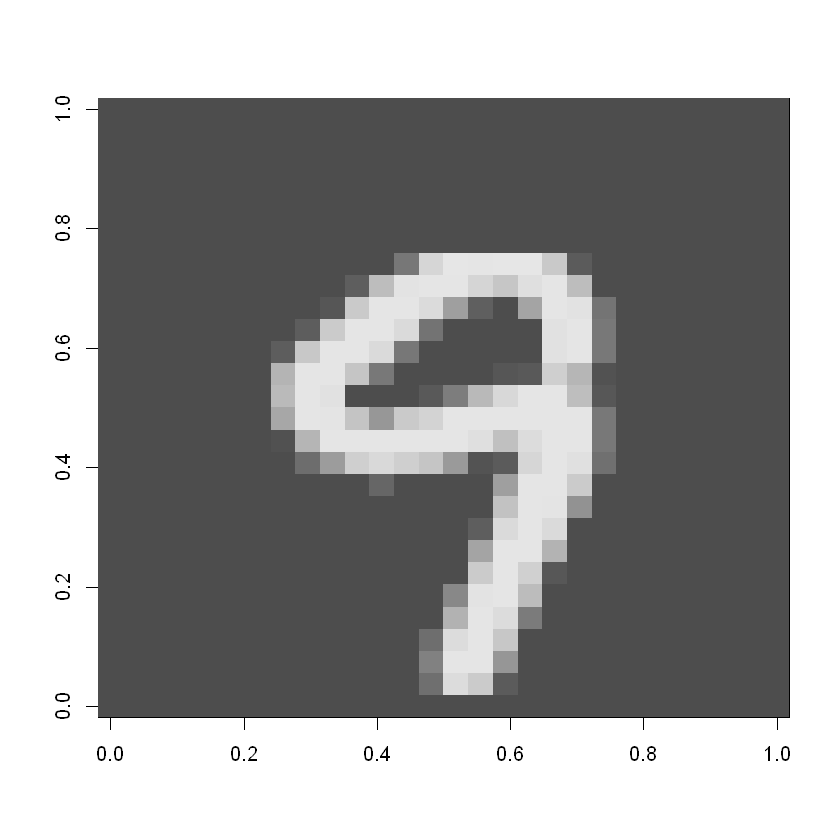

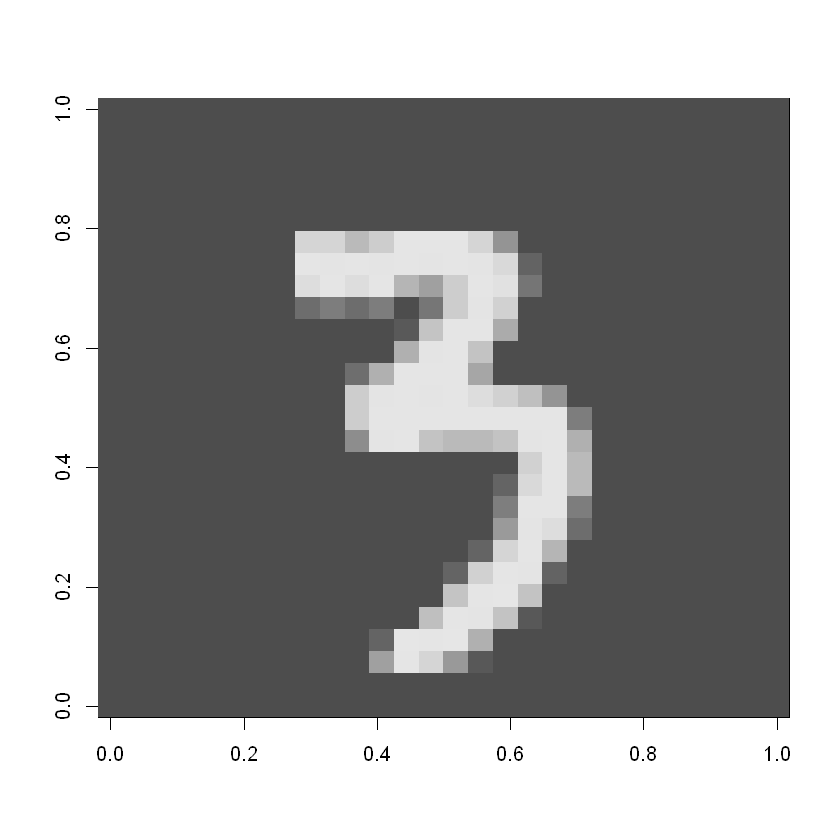

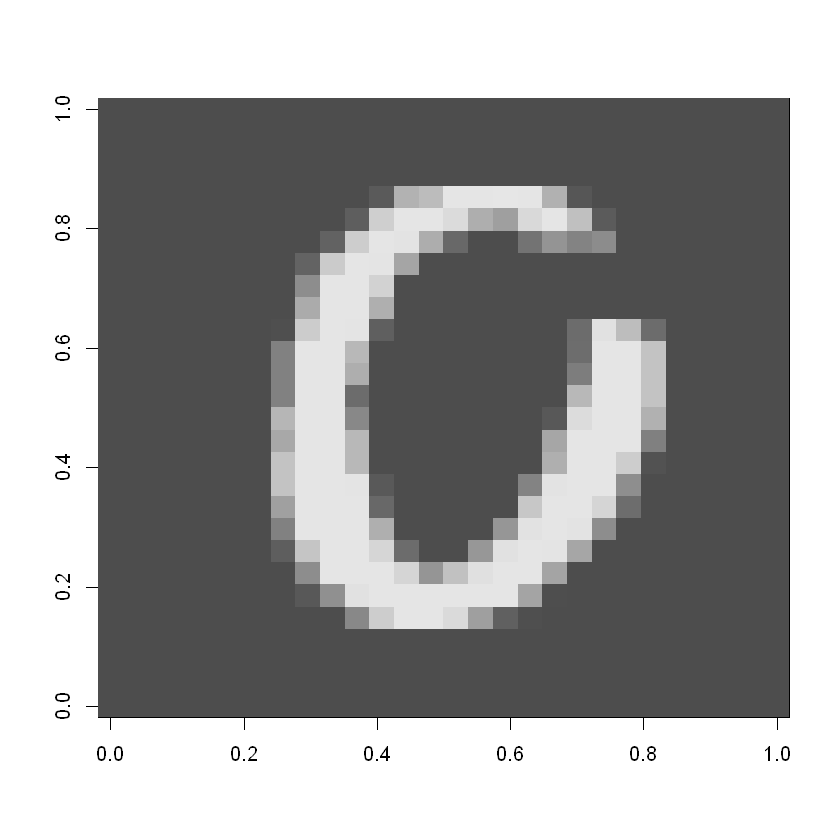

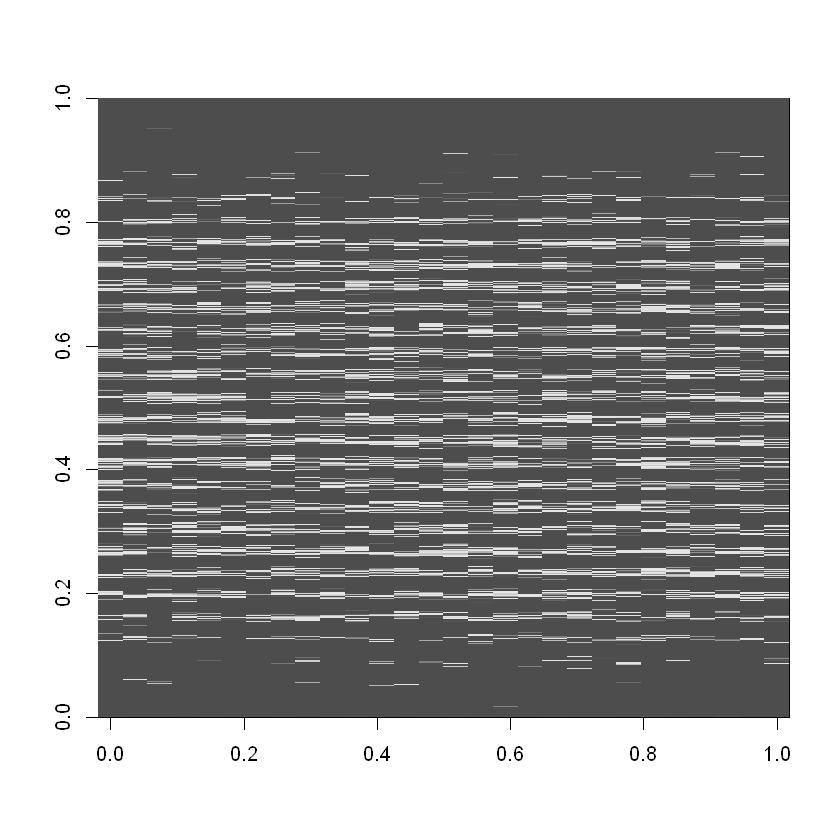

In [27]:
image(dig_1,col = grey.colors(255))
image(dig_2,col = grey.colors(255))
image(dig_3,col = grey.colors(255))
image(dig_4,col = grey.colors(255))

## Inicialização

In [39]:
h2o.init()
train = h2o.importFile("datasets/train.csv.gz")
test = h2o.importFile("datasets/test.csv.gz")

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         10 minutes 7 seconds 
    H2O cluster timezone:       America/Sao_Paulo 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.3 
    H2O cluster version age:    3 months and 29 days !!! 
    H2O cluster name:           H2O_started_from_R_Eduardo_bsp892 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.92 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 


Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (3 months and 29 days)!
Please download and install the latest version from http://h2o.ai/download/"



  |======================================================================| 100%
  |======================================================================| 100%


In [36]:
dim(train)
head(train)

[1] 60000   785

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
colnames(train)

[1] "C1"   "C2"   "C3"   "C4"   "C5"   "C6"   "C7"   "C8"   "C9"   "C10" 
 [11] "C11"  "C12"  "C13"  "C14"  "C15"  "C16"  "C17"  "C18"  "C19"  "C20" 
 [21] "C21"  "C22"  "C23"  "C24"  "C25"  "C26"  "C27"  "C28"  "C29"  "C30" 
 [31] "C31"  "C32"  "C33"  "C34"  "C35"  "C36"  "C37"  "C38"  "C39"  "C40" 
 [41] "C41"  "C42"  "C43"  "C44"  "C45"  "C46"  "C47"  "C48"  "C49"  "C50" 
 [51] "C51"  "C52"  "C53"  "C54"  "C55"  "C56"  "C57"  "C58"  "C59"  "C60" 
 [61] "C61"  "C62"  "C63"  "C64"  "C65"  "C66"  "C67"  "C68"  "C69"  "C70" 
 [71] "C71"  "C72"  "C73"  "C74"  "C75"  "C76"  "C77"  "C78"  "C79"  "C80" 
 [81] "C81"  "C82"  "C83"  "C84"  "C85"  "C86"  "C87"  "C88"  "C89"  "C90" 
 [91] "C91"  "C92"  "C93"  "C94"  "C95"  "C96"  "C97"  "C98"  "C99"  "C100"
[101] "C101" "C102" "C103" "C104" "C105" "C106" "C107" "C108" "C109" "C110"
[111] "C111" "C112" "C113" "C114" "C115" "C116" "C117" "C118" "C119" "C120"
[121] "C121" "C122" "C123" "C124" "C125" "C126" "C127" "C128" "C129" "C130"
[131] "C131" "C132" "C133" "C134" "C135" "C136" "C137" "C138" "C139" "C140"
[141] "C141" "C142" "C143" "C144" "C145" "C146" "C147" "C148" "C149" "C150"
[151] "C151" "C152" "C153" "C154" "C155" "C156" "C157" "C158" "C159" "C160"
[161] "C161" "C162" "C163" "C164" "C165" "C166" "C167" "C168" "C169" "C170"
[171] "C171" "C172" "C173" "C174" "C175" "C176" "C177" "C178" "C179" "C180"
[181] "C181" "C182" "C183" "C184" "C185" "C186" "C187" "C188" "C189" "C190"
[191] "C191" "C192" "C193" "C194" "C195" "C196" "C197" "C198" "C199" "C200"
[201] "C201" "C202" "C203" "C204" "C205" "C206" "C207" "C208" "C209" "C210"
[211] "C211" "C212" "C213" "C214" "C215" "C216" "C217" "C218" "C219" "C220"
[221] "C221" "C222" "C223" "C224" "C225" "C226" "C227" "C228" "C229" "C230"
[231] "C231" "C232" "C233" "C234" "C235" "C236" "C237" "C238" "C239" "C240"
[241] "C241" "C242" "C243" "C244" "C245" "C246" "C247" "C248" "C249" "C250"
[251] "C251" "C252" "C253" "C254" "C255" "C256" "C257" "C258" "C259" "C260"
[261] "C261" "C262" "C263" "C264" "C265" "C266" "C267" "C268" "C269" "C270"
[271] "C271" "C272" "C273" "C274" "C275" "C276" "C277" "C278" "C279" "C280"
[281] "C281" "C282" "C283" "C284" "C285" "C286" "C287" "C288" "C289" "C290"
[291] "C291" "C292" "C293" "C294" "C295" "C296" "C297" "C298" "C299" "C300"
[301] "C301" "C302" "C303" "C304" "C305" "C306" "C307" "C308" "C309" "C310"
[311] "C311" "C312" "C313" "C314" "C315" "C316" "C317" "C318" "C319" "C320"
[321] "C321" "C322" "C323" "C324" "C325" "C326" "C327" "C328" "C329" "C330"
[331] "C331" "C332" "C333" "C334" "C335" "C336" "C337" "C338" "C339" "C340"
[341] "C341" "C342" "C343" "C344" "C345" "C346" "C347" "C348" "C349" "C350"
[351] "C351" "C352" "C353" "C354" "C355" "C356" "C357" "C358" "C359" "C360"
[361] "C361" "C362" "C363" "C364" "C365" "C366" "C367" "C368" "C369" "C370"
[371] "C371" "C372" "C373" "C374" "C375" "C376" "C377" "C378" "C379" "C380"
[381] "C381" "C382" "C383" "C384" "C385" "C386" "C387" "C388" "C389" "C390"
[391] "C391" "C392" "C393" "C394" "C395" "C396" "C397" "C398" "C399" "C400"
[401] "C401" "C402" "C403" "C404" "C405" "C406" "C407" "C408" "C409" "C410"
[411] "C411" "C412" "C413" "C414" "C415" "C416" "C417" "C418" "C419" "C420"
[421] "C421" "C422" "C423" "C424" "C425" "C426" "C427" "C428" "C429" "C430"
[431] "C431" "C432" "C433" "C434" "C435" "C436" "C437" "C438" "C439" "C440"
[441] "C441" "C442" "C443" "C444" "C445" "C446" "C447" "C448" "C449" "C450"
[451] "C451" "C452" "C453" "C454" "C455" "C456" "C457" "C458" "C459" "C460"
[461] "C461" "C462" "C463" "C464" "C465" "C466" "C467" "C468" "C469" "C470"
[471] "C471" "C472" "C473" "C474" "C475" "C476" "C477" "C478" "C479" "C480"
[481] "C481" "C482" "C483" "C484" "C485" "C486" "C487" "C488" "C489" "C490"
[491] "C491" "C492" "C493" "C494" "C495" "C496" "C497" "C498" "C499" "C500"
[501] "C501" "C502" "C503" "C504" "C505" "C506" "C507" "C508" "C509" "C510"
[511] "C511" "C512" "C513" "C514" "C515" "C516" "C517" "C518" "C519" "C520"
[521] "C521" "C522" "C523" "C524" "C525" "C526" "C

In [40]:
# Transformar a classe em fator
train[,785] = as.factor(train[,785])
test[,785] = as.factor(test[,785])

## Modelo

In [42]:
model = h2o.deeplearning(x = colnames(train[,1:784]),
                         y = "C785",
                         training_frame = train,
                         validation_frame = test,
                         distribution = "AUTO",
                         activation = "RectifierWithDropout",
                         hidden = c(64,64,64),
                         sparse = TRUE,
                         epochs = 20
                        )

Warning message in .h2o.processResponseWarnings(res):
"Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83].
"


  |======================================================================| 100%


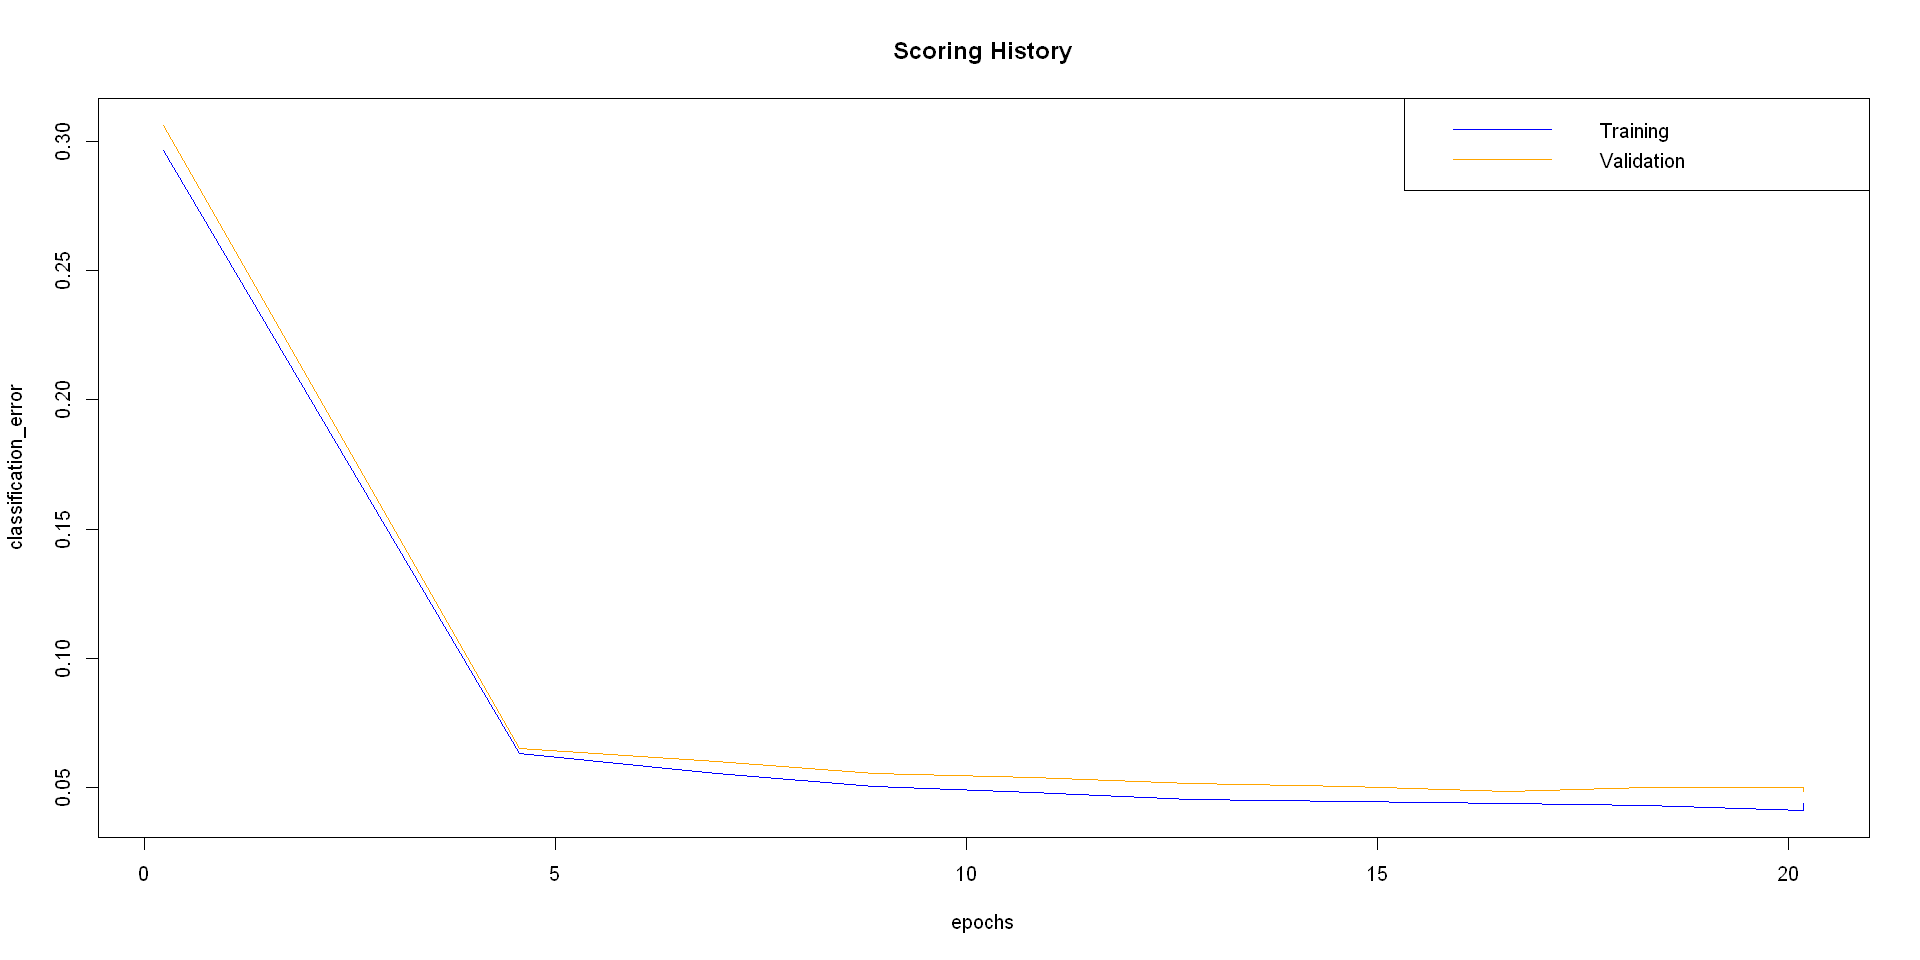

In [44]:
options(repr.plot.width = 16, repr.plot.height = 8)
plot(model)

## Peformance do modelo

In [45]:
h2o.performance(model)

H2OMultinomialMetrics: deeplearning
** Reported on training data. **
** Metrics reported on temporary training frame with 9980 samples **

Training Set Metrics: 

MSE: (Extract with `h2o.mse`) 0.0395783
RMSE: (Extract with `h2o.rmse`) 0.1989429
Logloss: (Extract with `h2o.logloss`) 0.1502515
Mean Per-Class Error: 0.04394839
AUC: (Extract with `h2o.auc`) NaN
AUCPR: (Extract with `h2o.aucpr`) NaN
Confusion Matrix: Extract with `h2o.confusionMatrix(<model>,train = TRUE)`)
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
         0    1    2   3   4   5   6    7   8   9  Error          Rate
0      899    0   14   2   0   2   3    1   3   0 0.0271 =    25 / 924
1        1 1128    8   1   1   1   0    5   7   0 0.0208 =  24 / 1.152
2        0    0  961   9   3   2   0   11   3   2 0.0303 =    30 / 991
3        1    4   28 947   1  32   0    9   7   2 0.0815 =  84 / 1.031
4        2    4   10   1 960   0   5    1   4  35 0.0607 =  62 / 1.022
5        2    2    4  14 

## Predict

In [46]:
train[20,785]
predict = h2o.predict(model, newdata = train[20,1:784])
predict$predict

[1] 4
Levels: 0 1 2 3 4 5 6 7 8 9

  |======================================================================| 100%


  predict
1       4

[1 row x 1 column] 